# GRIP : The Sparks Foundation

### Data Science and Business Analytics Intern
### by : Deepank Tyagi
### Task 1 : Prediction Using Supervised ML
### The Objective of this project is to predict the percentage score of a student based on the number of hours studied by that student using the Linear Regression model.

In [1]:
# Importing  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading data from remote url

In [2]:
URL = "http://bit.ly/w-data"
df=pd.read_csv(URL)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Exploring Data

In [4]:
df.shape   #(rows,columns)

(25, 2)

In [5]:
df.head()     # displays first five rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()            # gives additional information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
df.describe()        # gives statistical information about the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

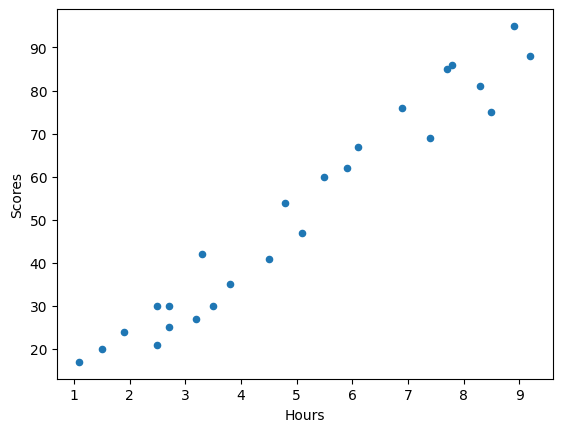

In [8]:
df.plot(kind= 'scatter' , x = 'Hours' , y = 'Scores');
plt.show()

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Linear Regression

In [10]:
x = df.iloc[:, :-1].values            # independent variable
y = df.iloc[:, 1].values              # dependent variable

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split                       # splittng data into training and testing data
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

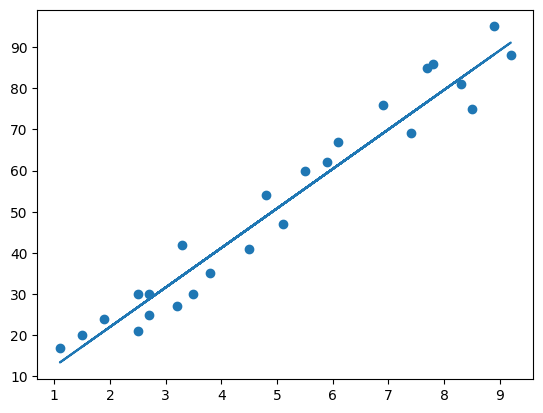

In [19]:
line = model.coef_*x+model.intercept_                    # y= m*x+c
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [20]:
model.score(X_test, y_test)                            # tells the accuracy of the model

0.971014141329942

In [24]:
y_pred = model.predict(X_test)                            # predicting values for the test data

In [25]:
actual_predicted = pd.DataFrame({'Target' : y_test, 'Predicted' : y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


#### What would be the predicted score if a student studies for 9.25 hours/day?

In [27]:
hours = 9.25
score = model.predict([[hours]])
print(f" The score for the student who will study for {hours} hours will be {score}")

 The score for the student who will study for 9.25 hours will be [91.56986604]


#### Model Evaluation

In [28]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score :' ,r2_score(y_test, y_pred))

Mean Absolute Error : 4.5916495300630285
R2 Score : 0.971014141329942
